In [ ]:
import matplotlib.pyplot as plt

# Replace 'path/to/image.png' with the actual path where you downloaded the image
image = plt.imread('/kaggle/working/4200mask/Tuberculosis/Tuberculosis-397.png')
plt.imshow(image)
plt.show()


In [ ]:
image.shape

In [ ]:
import shutil
import os

# Define the source and destination directories
source_dir = '/kaggle/input/azteunet'
destination_dir = '/kaggle/working/data'

# Move the folder
try:
    shutil.copy(source_dir, destination_dir)
    print(f"Kaggle folder moved from {source_dir} to {destination_dir}")
except Exception as e:
    print(f"Error moving Kaggle folder: {e}")


In [ ]:
import os
import shutil

# Define the source and destination folders in Kaggle
source_folder = '/kaggle/input/azteunet/masks'
destination_folder = '/kaggle/working/jsrt/masks'

# Create the destination folder if it doesn't exist
# os.makedirs(destination_folder, exist_ok=True)

# Copy all files from source to destination
for file_name in os.listdir(source_folder):
    full_file_name = os.path.join(source_folder, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, destination_folder)

print("All files have been copied successfully.")


**Data Augmentation**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from PIL import Image

# Define the folders
original_image_folder = '/kaggle/working/jsrt/cxr'
threshold_image_folder = '/kaggle/working/jsrt/threshold'
mask_image_folder = '/kaggle/working/jsrt/masks'
augmented_original_folder = '/kaggle/working/jsrtaug/cxr'
augmented_threshold_folder = '/kaggle/working/jsrtaug/threshold'
augmented_mask_folder = '/kaggle/working/jsrtaug/masks'

# Create the folders if they don't exist
os.makedirs(augmented_original_folder, exist_ok=True)
os.makedirs(augmented_threshold_folder, exist_ok=True)
os.makedirs(augmented_mask_folder, exist_ok=True)

# Define the data augmentation parameters
datagen = ImageDataGenerator(
    zoom_range=0.2,
    rotation_range=3
)

def save_augmented_image(image_array, save_folder, image_name, counter):
    aug_image = array_to_img(image_array[0])
    aug_image = aug_image.convert('L')  # Convert to grayscale
    base_name, ext = os.path.splitext(image_name)
    new_image_name = f"{base_name}_{counter}{ext}"
    aug_image.save(os.path.join(save_folder, new_image_name))

def augment_and_save_images(image_name, num_augments=3):
    # Load the images
    original_img_path = os.path.join(original_image_folder, image_name)
    threshold_img_path = os.path.join(threshold_image_folder, image_name)
    mask_img_path = os.path.join(mask_image_folder, image_name)
    
    original_img = load_img(original_img_path).convert('L')  # Convert to grayscale
    threshold_img = load_img(threshold_img_path).convert('L')  # Convert to grayscale
    mask_img = load_img(mask_img_path).convert('L')  # Convert to grayscale
    
    original_x = img_to_array(original_img)
    threshold_x = img_to_array(threshold_img)
    mask_x = img_to_array(mask_img)
    
    original_x = np.expand_dims(original_x, axis=0)
    threshold_x = np.expand_dims(threshold_x, axis=0)
    mask_x = np.expand_dims(mask_x, axis=0)
    
    # Augment the images and save
    counter = 0
    seed = np.random.randint(10000)  # Generate a random seed for consistent transformations
    for i in range(num_augments):
        for batch in datagen.flow(original_x, batch_size=1, seed=seed):
            save_augmented_image(batch, augmented_original_folder, image_name, counter)
            break
        for batch in datagen.flow(threshold_x, batch_size=1, seed=seed):
            save_augmented_image(batch, augmented_threshold_folder, image_name, counter)
            break
        for batch in datagen.flow(mask_x, batch_size=1, seed=seed):
            save_augmented_image(batch, augmented_mask_folder, image_name, counter)
            break
        counter += 1

# Get the list of image names
image_names = os.listdir(original_image_folder)

# Apply augmentation to each set of images
for image_name in image_names:
    augment_and_save_images(image_name, num_augments=3)

def show_images_with_same_name(image_names, title):
    plt.figure(figsize=(30, 10))
    for i, image_name in enumerate(image_names):
        base_name, ext = os.path.splitext(image_name)
        for j in range(3):  # Display the first 3 augmentations
            aug_original_img_path = os.path.join(augmented_original_folder, f"{base_name}_{j}{ext}")
            aug_threshold_img_path = os.path.join(augmented_threshold_folder, f"{base_name}_{j}{ext}")
            aug_mask_img_path = os.path.join(augmented_mask_folder, f"{base_name}_{j}{ext}")
            
            aug_original_img = load_img(aug_original_img_path)
            aug_threshold_img = load_img(aug_threshold_img_path)
            aug_mask_img = load_img(aug_mask_img_path)
            
            plt.subplot(len(image_names), 9, i * 9 + j * 3 + 1)
            plt.imshow(aug_original_img, cmap='gray')
            plt.title(f'{image_name} - Original_{j}')
            plt.axis('off')
            
            plt.subplot(len(image_names), 9, i * 9 + j * 3 + 2)
            plt.imshow(aug_threshold_img, cmap='gray')
            plt.title(f'{image_name} - Threshold_{j}')
            plt.axis('off')
            
            plt.subplot(len(image_names), 9, i * 9 + j * 3 + 3)
            plt.imshow(aug_mask_img, cmap='gray')
            plt.title(f'{image_name} - Mask_{j}')
            plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display the first 3 sets of 3 augmented images
show_images_with_same_name(image_names[:3], 'Augmented Images with Same Name and Incremented Variable')


In [ ]:
import cv2
import matplotlib.pyplot as plt

size=(224, 224)

# Read the image in grayscale
image = cv2.imread('/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-500.png', cv2.IMREAD_GRAYSCALE)

# Apply CLAHE to enhance local contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_image = clahe.apply(image)

# Resize the image
resized_image = cv2.resize(enhanced_image, size, interpolation=cv2.INTER_AREA)

# Generate the threshold image
_, threshold_image = cv2.threshold(resized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Plot the original grayscale image
plt.subplot(131)  # Create a subplot at position 1,2 (1st row, 2nd column)
plt.imshow(image, cmap='gray')  # Plot grayscale image with 'gray' colormap
plt.title('Original Grayscale Image')
plt.axis('off')  # Hide axes for cleaner plot

# Plot the enhanced image
plt.subplot(132)  # Create a subplot at position 1,2 (1st row, 2nd column)
plt.imshow(enhanced_image, cmap='gray')  # Plot grayscale image with 'gray' colormap
plt.title('Enhanced Image (CLAHE)')
plt.axis('off')  # Hide axes for cleaner plot

# Plot the enhanced image
plt.subplot(133)  # Create a subplot at position 1,2 (1st row, 2nd column)
plt.imshow(threshold_image, cmap='gray')  # Plot grayscale image with 'gray' colormap
plt.title('Threshold Image')
plt.axis('off')  # Hide axes for cleaner plot

# Show the plots
plt.show()


In [11]:
import os
import cv2
from tqdm import tqdm

# Paths to the input, output, and threshold directories
input_dir = '/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis'
output_dir = '/kaggle/working/tb4200/cxr'
threshold_dir = '/kaggle/working/tb4200/threshold'

# Ensure output and threshold directories exist
os.makedirs(output_dir, exist_ok=True)
os.makedirs(threshold_dir, exist_ok=True)

# Function to apply CLAHE, resize, generate threshold image, and save
def enhance_resize_threshold_and_save(image_path, output_dir, threshold_dir, size=(224, 224)):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply CLAHE to enhance local contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(image)

    # Resize the image
    resized_image = cv2.resize(enhanced_image, size, interpolation=cv2.INTER_AREA)

    # Generate the threshold image
    _, threshold_image = cv2.threshold(resized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Save the enhanced image
    filename = os.path.basename(image_path)
    enhanced_output_path = os.path.join(output_dir, filename)
    cv2.imwrite(enhanced_output_path, resized_image)

    # Save the threshold image
    threshold_output_path = os.path.join(threshold_dir, filename)
    cv2.imwrite(threshold_output_path, threshold_image)

# Get list of all image files in the input directory
image_files = [os.path.join(input_dir, f) for f in os.listdir(input_dir) if os.path.isfile(os.path.join(input_dir, f))]

# Process each image file with progress tracking
for image_file in tqdm(image_files, desc="Processing images"):
    enhance_resize_threshold_and_save(image_file, output_dir, threshold_dir)

print("Enhanced, resized, and threshold images are saved to their respective directories.")


Processing images: 100%|██████████| 700/700 [00:13<00:00, 50.74it/s]

Enhanced, resized, and threshold images are saved to their respective directories.


In [ ]:
import os
import cv2
from tqdm import tqdm

# Define the input and output directories
input_dir = '/kaggle/input/jsrt-247-image-lung-segmentation-mask-dataset/content/jsrt/masks'
output_dir = '/kaggle/working/jsrt/masks'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Function to resize and convert to grayscale
def resize_and_convert_to_grayscale(image_path, output_dir, size=(224, 224)):
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the image
    resized_image = cv2.resize(gray_image, size, interpolation=cv2.INTER_AREA)

    # Save the processed image
    filename = os.path.basename(image_path)
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, resized_image)

# Get list of all image files in the input directory
image_files = [os.path.join(input_dir, f) for f in os.listdir(input_dir) if os.path.isfile(os.path.join(input_dir, f))]

# Process each image file with progress tracking
for image_file in tqdm(image_files, desc="Processing images"):
    resize_and_convert_to_grayscale(image_file, output_dir)

print("All images have been resized, converted to grayscale, and saved to the output directory.")


In [ ]:
import os

def list_files(folder):
    """Returns a set of file names in the given folder."""
    return set(os.listdir(folder))

def find_missing_files(folder1, folder2):
    """Finds files in folder1 that are not present in folder2."""
    files1 = list_files(folder1)
    files2 = list_files(folder2)
    missing_files = files1 - files2
    return missing_files





# Example usage
folder1 = '/kaggle/input/chest-xray-masks-and-labels/Lung Segmentation/CXR_png'
folder2 = '/kaggle/input/azteunet/enhanced_images'

missing_files = find_missing_files(folder1, folder2)


print(len(missing_files))

In [ ]:
# prompt: check total image of folders

import os

# Get the list of folders
folders = ['/kaggle/working/jsrtaug/cxr', '/kaggle/working/jsrtaug/threshold', '/kaggle/working/jsrtaug/masks', ]

# Iterate over the folders and count the number of images
for folder in folders:
    image_count = len(os.listdir(folder))
    print(f"Total images in {folder}: {image_count}")



In [ ]:
import os
import shutil

# Specify the path to the folder you want to delete
folder_path = '/kaggle/working/4200'

# Remove the folder and all its contents
shutil.rmtree(folder_path)

print(f"Folder '{folder_path}' has been removed.")


In [ ]:
import os

# Define the directory containing the files to rename
directory = '/kaggle/working/shenmon/masks'

# Iterate over all files in the directory
for filename in os.listdir(directory):
    # Check if the file ends with '_mask.png'
    if filename.endswith('_mask.png'):
        # Create the new filename by replacing '_mask.png' with '.png'
        new_filename = filename.replace('_mask.png', '.png')
        # Get the full path to the old and new filenames
        old_file = os.path.join(directory, filename)
        new_file = os.path.join(directory, new_filename)
        # Rename the file
        os.rename(old_file, new_file)

print("All files have been renamed.")


In [ ]:
import os

# Define the directories
source_dir = '/kaggle/working/shenmiss/threshold'
reference_dir = '/kaggle/input/azteunet/enhanced_images'

# Get the set of filenames (without extension) from the reference directory
reference_files = {os.path.splitext(f)[0] for f in os.listdir(reference_dir) if os.path.isfile(os.path.join(reference_dir, f))}

# Iterate over all files in the source directory
for filename in os.listdir(source_dir):
    if os.path.isfile(os.path.join(source_dir, filename)):
        # Get the base name without extension
        base_name = os.path.splitext(filename)[0]
        
        # Check if the base name exists in the reference directory
        if base_name not in reference_files:
            # If not, delete the file from the source directory
            os.remove(os.path.join(source_dir, filename))
            print(f"Deleted: {filename}")

print("Files that do not have a corresponding file in the reference directory have been deleted.")


In [ ]:
import shutil

# Specify the folder you want to zip and the output zip file name
folder_path = '/kaggle/working/data'
output_zip = '/kaggle/working/data.zip'

# Create a zip archive
shutil.make_archive(output_zip, 'zip', folder_path)

print(f"Folder '{folder_path}' has been zipped to '{output_zip}.zip'.")


In [ ]:
# import os
# import numpy as np
# from PIL import Image
# from tensorflow.keras.utils import Sequence

# class DataGenerator(Sequence):
#     def __init__(self, original_image_folder, threshold_image_folder, mask_image_folder, batch_size=32, target_size=(224, 224)):
#         self.original_image_folder = original_image_folder
#         self.threshold_image_folder = threshold_image_folder
#         self.mask_image_folder = mask_image_folder
#         self.batch_size = batch_size
#         self.target_size = target_size

#         self.original_filenames = sorted(os.listdir(self.original_image_folder))
#         self.threshold_filenames = sorted(os.listdir(self.threshold_image_folder))
#         self.mask_filenames = sorted(os.listdir(self.mask_image_folder))

#     def __len__(self):
#         return int(np.ceil(len(self.original_filenames) / self.batch_size))

#     def __getitem__(self, idx):
#         batch_original_filenames = self.original_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]
#         batch_threshold_filenames = self.threshold_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]
#         batch_mask_filenames = self.mask_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]

#         original_images = np.zeros((self.batch_size, *self.target_size, 1))
#         threshold_images = np.zeros((self.batch_size, *self.target_size, 1))
#         mask_images = np.zeros((self.batch_size, *self.target_size, 1))

#         for i, filename in enumerate(batch_original_filenames):
#             original_path = os.path.join(self.original_image_folder, filename)
#             threshold_path = os.path.join(self.threshold_image_folder, batch_threshold_filenames[i])
#             mask_path = os.path.join(self.mask_image_folder, batch_mask_filenames[i])

#             original_img = Image.open(original_path).convert('L').resize(self.target_size)
#             threshold_img = Image.open(threshold_path).convert('L').resize(self.target_size)
#             mask_img = Image.open(mask_path).convert('L').resize(self.target_size)

#             original_img = np.array(original_img) / 255.0
#             threshold_img = np.array(threshold_img) / 255.0
#             mask_img = np.array(mask_img) / 255.0

#             original_images[i, :, :, 0] = original_img
#             threshold_images[i, :, :, 0] = threshold_img
#             mask_images[i, :, :, 0] = mask_img

#         return [original_images, threshold_images], mask_images

# # Paths to the datasets
# original_image_folder = '/kaggle/working/jsrtaug/cxr'
# threshold_image_folder = '/kaggle/working/jsrtaug/threshold'
# mask_image_folder = '/kaggle/working/jsrtaug/masks'

# # Create the DataGenerator instances
# train_generator = DataGenerator(original_image_folder, threshold_image_folder, mask_image_folder, batch_size=16)
# val_generator = DataGenerator(original_image_folder, threshold_image_folder, mask_image_folder, batch_size=16)

# # Plot images from the first batch
# import matplotlib.pyplot as plt

# def plot_images(generator):
#     [original_images, threshold_images], mask_images = next(iter(generator))
    
#     print(original_images.shape)
#     print(threshold_images.shape)
#     print(mask_images.shape)
#     plt.figure(figsize=(12, 12))
    
#     for i in range(4):
#         # Original image
#         plt.subplot(4, 3, i * 3 + 1)
#         plt.imshow(original_images[i, :, :, 0], cmap='gray')
#         plt.title('Original')
#         plt.axis('off')
        
#         # Threshold image
#         plt.subplot(4, 3, i * 3 + 2)
#         plt.imshow(threshold_images[i, :, :, 0], cmap='gray')
#         plt.title('Threshold')
#         plt.axis('off')
        
#         # Mask image
#         plt.subplot(4, 3, i * 3 + 3)
#         plt.imshow(mask_images[i, :, :, 0], cmap='gray')
#         plt.title('Mask')
#         plt.axis('off')
    
#     plt.tight_layout()
#     plt.show()

# # Plot the first batch of images
# plot_images(train_generator)


**Data Generator (Needed)**

**Data generator with augmentation**

In [ ]:
import os
import numpy as np
from PIL import Image, ImageEnhance
from tensorflow.keras.utils import Sequence
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class DataGenerator(Sequence):
    def __init__(self, original_filenames, threshold_filenames, mask_filenames, original_image_folder, threshold_image_folder, mask_image_folder, batch_size=32, target_size=(224, 224), augment=False):
        self.original_filenames = original_filenames
        self.threshold_filenames = threshold_filenames
        self.mask_filenames = mask_filenames
        self.original_image_folder = original_image_folder
        self.threshold_image_folder = threshold_image_folder
        self.mask_image_folder = mask_image_folder
        self.batch_size = batch_size
        self.target_size = target_size
        self.augment = augment

    def __len__(self):
        return int(np.ceil(len(self.original_filenames) / self.batch_size))

    def __getitem__(self, idx):
        batch_original_filenames = self.original_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_threshold_filenames = self.threshold_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_mask_filenames = self.mask_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]

        original_images = np.zeros((self.batch_size, *self.target_size, 1))
        threshold_images = np.zeros((self.batch_size, *self.target_size, 1))
        mask_images = np.zeros((self.batch_size, *self.target_size, 1))

        for i, filename in enumerate(batch_original_filenames):
            original_path = os.path.join(self.original_image_folder, filename)
            threshold_path = os.path.join(self.threshold_image_folder, batch_threshold_filenames[i])
            mask_path = os.path.join(self.mask_image_folder, batch_mask_filenames[i])

            original_img = Image.open(original_path).convert('L').resize(self.target_size, Image.LANCZOS)
            threshold_img = Image.open(threshold_path).convert('L').resize(self.target_size, Image.LANCZOS)
            mask_img = Image.open(mask_path).convert('L').resize(self.target_size, Image.LANCZOS)

            if self.augment:
                original_img, threshold_img, mask_img = self.apply_augmentation(original_img, threshold_img, mask_img)

            original_img = np.array(original_img) / 255.0
            threshold_img = np.array(threshold_img) / 255.0
            mask_img = np.array(mask_img) / 255.0

            original_images[i, :, :, 0] = original_img
            threshold_images[i, :, :, 0] = threshold_img
            mask_images[i, :, :, 0] = mask_img

        return [original_images, threshold_images], mask_images

    def apply_augmentation(self, original_img, threshold_img, mask_img):
        # Random rotation
        if random.random() > 0.5:
            angle = random.uniform(-15, 15)
            original_img = original_img.rotate(angle)
            threshold_img = threshold_img.rotate(angle)
            mask_img = mask_img.rotate(angle)

        # Random zoom
        if random.random() > 0.5:
            scale = random.uniform(0.8, 1.2)
            w, h = original_img.size
            new_w, new_h = int(w * scale), int(h * scale)
            original_img = original_img.resize((new_w, new_h), Image.LANCZOS)
            threshold_img = threshold_img.resize((new_w, new_h), Image.LANCZOS)
            mask_img = mask_img.resize((new_w, new_h), Image.LANCZOS)

            # Center crop to original size
            left = (new_w - w) // 2
            top = (new_h - h) // 2
            original_img = original_img.crop((left, top, left + w, top + h))
            threshold_img = threshold_img.crop((left, top, left + w, top + h))
            mask_img = mask_img.crop((left, top, left + w, top + h))

        # Random crop
        if random.random() > 0.5:
            crop_size = random.uniform(0.8, 1.0)
            w, h = original_img.size
            new_w, new_h = int(w * crop_size), int(h * crop_size)
            left = random.randint(0, w - new_w)
            top = random.randint(0, h - new_h)
            original_img = original_img.crop((left, top, left + new_w, top + new_h))
            threshold_img = threshold_img.crop((left, top, left + new_w, top + new_h))
            mask_img = mask_img.crop((left, top, left + new_w, top + new_h))

            # Resize back to original size
            original_img = original_img.resize((w, h), Image.LANCZOS)
            threshold_img = threshold_img.resize((w, h), Image.LANCZOS)
            mask_img = mask_img.resize((w, h), Image.LANCZOS)

        # Random brightness adjustment
        if random.random() > 0.5:
            enhancer = ImageEnhance.Brightness(original_img)
            original_img = enhancer.enhance(random.uniform(0.8, 1.2))
            enhancer = ImageEnhance.Brightness(threshold_img)
            threshold_img = enhancer.enhance(random.uniform(0.8, 1.2))

        # Random contrast adjustment
        if random.random() > 0.5:
            enhancer = ImageEnhance.Contrast(original_img)
            original_img = enhancer.enhance(random.uniform(0.8, 1.2))
            enhancer = ImageEnhance.Contrast(threshold_img)
            threshold_img = enhancer.enhance(random.uniform(0.8, 1.2))

        return original_img, threshold_img, mask_img

# Paths to the datasets
original_image_folder = '/kaggle/input/segdata/SegData/jsrtshenmonenh/cxr'
threshold_image_folder = '/kaggle/input/segdata/SegData/jsrtshenmonenh/threshold'
mask_image_folder = '/kaggle/input/segdata/SegData/jsrtshenmonenh/masks'

# Get the list of filenames
original_filenames = sorted(os.listdir(original_image_folder))
threshold_filenames = sorted(os.listdir(threshold_image_folder))
mask_filenames = sorted(os.listdir(mask_image_folder))

# Split the data into training (80%) and test (20%) sets
train_original, test_original, train_threshold, test_threshold, train_mask, test_mask = train_test_split(
    original_filenames, threshold_filenames, mask_filenames, test_size=0.2, random_state=42)

# Split the training set further into training (80%) and validation (20%) sets
# train_original, val_original, train_threshold, val_threshold, train_mask, val_mask = train_test_split(
#     train_original, train_threshold, train_mask, test_size=0.2, random_state=42)

# Create the DataGenerator instances with the split datasets
# train_generator = DataGenerator(train_original, train_threshold, train_mask, original_image_folder, threshold_image_folder, mask_image_folder, batch_size=16, augment=True)
# val_generator = DataGenerator(val_original, val_threshold, val_mask, original_image_folder, threshold_image_folder, mask_image_folder, batch_size=16)
test_generator = DataGenerator(test_original, test_threshold, test_mask, original_image_folder, threshold_image_folder, mask_image_folder, batch_size=16)

# Plot images from the first batch
def plot_images(generator):
    [original_images, threshold_images], mask_images = next(iter(generator))
    
    print(original_images.shape)
    print(threshold_images.shape)
    print(mask_images.shape)
    plt.figure(figsize=(12, 12))
    
    for i in range(4):
        # Original image
        plt.subplot(4, 3, i * 3 + 1)
        plt.imshow(original_images[i, :, :, 0], cmap='gray')
        plt.title('Original')
        plt.axis('off')
        
        # Threshold image
        plt.subplot(4, 3, i * 3 + 2)
        plt.imshow(threshold_images[i, :, :, 0], cmap='gray')
        plt.title('Threshold')
        plt.axis('off')
        
        # Mask image
        plt.subplot(4, 3, i * 3 + 3)
        plt.imshow(mask_images[i, :, :, 0], cmap='gray')
        plt.title('Mask')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot the first batch of images with augmentation
plot_images(test_generator)


In [ ]:
# import os
# import numpy as np
# from PIL import Image
# from tensorflow.keras.utils import Sequence
# from keras.preprocessing.image import ImageDataGenerator, img_to_array
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split

# class DataGenerator(Sequence):
#     def __init__(self, original_filenames, threshold_filenames, mask_filenames, original_image_folder, threshold_image_folder, mask_image_folder, batch_size=32, target_size=(224, 224), augment=False):
#         self.original_filenames = original_filenames
#         self.threshold_filenames = threshold_filenames
#         self.mask_filenames = mask_filenames
#         self.original_image_folder = original_image_folder
#         self.threshold_image_folder = threshold_image_folder
#         self.mask_image_folder = mask_image_folder
#         self.batch_size = batch_size
#         self.target_size = target_size
#         self.augment = augment
        
#         if self.augment:
#             self.datagen = ImageDataGenerator(
#                 zoom_range=0.2,
#                 rotation_range=3
#             )

#     def __len__(self):
#         return int(np.ceil(len(self.original_filenames) / self.batch_size))

#     def __getitem__(self, idx):
#         batch_original_filenames = self.original_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]
#         batch_threshold_filenames = self.threshold_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]
#         batch_mask_filenames = self.mask_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]

#         original_images = np.zeros((self.batch_size, *self.target_size, 1))
#         threshold_images = np.zeros((self.batch_size, *self.target_size, 1))
#         mask_images = np.zeros((self.batch_size, *self.target_size, 1))

#         for i, filename in enumerate(batch_original_filenames):
#             original_path = os.path.join(self.original_image_folder, filename)
#             threshold_path = os.path.join(self.threshold_image_folder, batch_threshold_filenames[i])
#             mask_path = os.path.join(self.mask_image_folder, batch_mask_filenames[i])

#             original_img = Image.open(original_path).convert('L').resize(self.target_size, Image.LANCZOS)
#             threshold_img = Image.open(threshold_path).convert('L').resize(self.target_size, Image.LANCZOS)
#             mask_img = Image.open(mask_path).convert('L').resize(self.target_size, Image.LANCZOS)

#             if self.augment:
#                 original_img, threshold_img, mask_img = self.apply_augmentation(original_img, threshold_img, mask_img)

#             original_img = np.array(original_img) / 255.0
#             threshold_img = np.array(threshold_img) / 255.0
#             mask_img = np.array(mask_img) / 255.0

#             original_images[i, :, :, 0] = original_img
#             threshold_images[i, :, :, 0] = threshold_img
#             mask_images[i, :, :, 0] = mask_img

#         return [original_images, threshold_images], mask_images

#     def apply_augmentation(self, original_img, threshold_img, mask_img):
#         seed = np.random.randint(10000)
        
#         original_x = np.expand_dims(img_to_array(original_img), axis=0)
#         threshold_x = np.expand_dims(img_to_array(threshold_img), axis=0)
#         mask_x = np.expand_dims(img_to_array(mask_img), axis=0)

#         original_img_aug = self.datagen.flow(original_x, batch_size=1, seed=seed)[0][0]
#         threshold_img_aug = self.datagen.flow(threshold_x, batch_size=1, seed=seed)[0][0]
#         mask_img_aug = self.datagen.flow(mask_x, batch_size=1, seed=seed)[0][0]

#         # Convert back to PIL Image and ensure single channel
#         original_img_aug = Image.fromarray(original_img_aug.astype('uint8').squeeze())
#         threshold_img_aug = Image.fromarray(threshold_img_aug.astype('uint8').squeeze())
#         mask_img_aug = Image.fromarray(mask_img_aug.astype('uint8').squeeze())

#         return original_img_aug, threshold_img_aug, mask_img_aug

# # Paths to the datasets
# original_image_folder = '/kaggle/input/segdata/SegData/jsrtshenmonenh/cxr'
# threshold_image_folder = '/kaggle/input/segdata/SegData/jsrtshenmonenh/threshold'
# mask_image_folder = '/kaggle/input/segdata/SegData/jsrtshenmonenh/masks'

# # Get the list of filenames
# original_filenames = sorted(os.listdir(original_image_folder))
# threshold_filenames = sorted(os.listdir(threshold_image_folder))
# mask_filenames = sorted(os.listdir(mask_image_folder))

# # Split the data into training (80%) and test (20%) sets
# train_original, test_original, train_threshold, test_threshold, train_mask, test_mask = train_test_split(
#     original_filenames, threshold_filenames, mask_filenames, test_size=0.2, random_state=42)

# # Split the training set further into training (80%) and validation (20%) sets
# train_original, val_original, train_threshold, val_threshold, train_mask, val_mask = train_test_split(
#     train_original, train_threshold, train_mask, test_size=0.2, random_state=42)

# # Create the DataGenerator instances with the split datasets
# train_generator = DataGenerator(train_original, train_threshold, train_mask, original_image_folder, threshold_image_folder, mask_image_folder, batch_size=16, augment=True)
# val_generator = DataGenerator(val_original, val_threshold, val_mask, original_image_folder, threshold_image_folder, mask_image_folder, batch_size=16)
# test_generator = DataGenerator(test_original, test_threshold, test_mask, original_image_folder, threshold_image_folder, mask_image_folder, batch_size=16)

# # Plot images from the first batch
# def plot_images(generator):
#     [original_images, threshold_images], mask_images = next(iter(generator))
    
#     print(original_images.shape)
#     print(threshold_images.shape)
#     print(mask_images.shape)
#     plt.figure(figsize=(12, 12))
    
#     for i in range(4):
#         # Original image
#         plt.subplot(4, 3, i * 3 + 1)
#         plt.imshow(original_images[i, :, :, 0], cmap='gray')
#         plt.title('Original')
#         plt.axis('off')
        
#         # Threshold image
#         plt.subplot(4, 3, i * 3 + 2)
#         plt.imshow(threshold_images[i, :, :, 0], cmap='gray')
#         plt.title('Threshold')
#         plt.axis('off')
        
#         # Mask image
#         plt.subplot(4, 3, i * 3 + 3)
#         plt.imshow(mask_images[i, :, :, 0], cmap='gray')
#         plt.title('Mask')
#         plt.axis('off')
    
#     plt.tight_layout()
#     plt.show()

# # Plot the first batch of images with augmentation
# plot_images(train_generator)


In [ ]:
import os
import cv2

# Path to the input directory
input_dir = '/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Normal'

# Path to the output directory
output_dir = '/kaggle/working//TB_Norm_Enhanced'

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Function to apply CLAHE and save the image
def enhance_and_save(image_path, output_dir):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply CLAHE to enhance local contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(image)

    # Save the result
    filename = os.path.basename(image_path)
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, enhanced_image)

# Get list of all image files in the input directory
image_files = [os.path.join(input_dir, f) for f in os.listdir(input_dir) if os.path.isfile(os.path.join(input_dir, f))]

# Process each image file
for image_file in image_files:
    enhance_and_save(image_file, output_dir)

print("Enhanced images are saved to the output directory.")

In [ ]:
import shutil

folder_path = '/kaggle/working//CXR_enhanced'
zip_path = '/kaggle/working//CXR_enhanced.zip'

# Create a zip archive of the specified folder
shutil.make_archive(zip_path.replace('.zip', ''), 'zip', folder_path)


In [ ]:
image_path = output_dir

In [ ]:
tf.__version__

**Model (Needed)**

best below

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K

def conv_block(input_tensor, num_filters):
    x = Conv2D(num_filters, (3, 3), activation='relu', padding='same')(input_tensor)
    x = Conv2D(num_filters, (3, 3), activation='relu', padding='same')(x)
    return x

def unet_plus_plus(input_shape):
    base_input = Input(shape=input_shape, name="base_input")
    threshold_input = Input(shape=input_shape, name="threshold_input")

    # First few layers using only base input
    x0_0 = conv_block(base_input, 64)
    x1_0 = conv_block(MaxPooling2D((2, 2))(x0_0), 128)
    x2_0 = conv_block(MaxPooling2D((2, 2))(x1_0), 256)

    # Introducing the threshold input later
    x2_0 = concatenate([x2_0, MaxPooling2D((4, 4))(threshold_input)], axis=-1)

    # Continue with the UNet++ structure
    x3_0 = conv_block(MaxPooling2D((2, 2))(x2_0), 512)
    x4_0 = conv_block(MaxPooling2D((2, 2))(x3_0), 1024)

    x0_1 = conv_block(concatenate([x0_0, Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x1_0)]), 64)
    x1_1 = conv_block(concatenate([x1_0, Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(x2_0)]), 128)
    x2_1 = conv_block(concatenate([x2_0, Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(x3_0)]), 256)
    x3_1 = conv_block(concatenate([x3_0, Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(x4_0)]), 512)

    x0_2 = conv_block(concatenate([x0_0, x0_1, Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x1_1)]), 64)
    x1_2 = conv_block(concatenate([x1_0, x1_1, Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(x2_1)]), 128)
    x2_2 = conv_block(concatenate([x2_0, x2_1, Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(x3_1)]), 256)

    x0_3 = conv_block(concatenate([x0_0, x0_1, x0_2, Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x1_2)]), 64)
    x1_3 = conv_block(concatenate([x1_0, x1_1, x1_2, Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(x2_2)]), 128)

    x0_4 = conv_block(concatenate([x0_0, x0_1, x0_2, x0_3, Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x1_3)]), 64)

    output = Conv2D(1, (1, 1), activation='sigmoid')(x0_4)

    model = Model(inputs=[base_input, threshold_input], outputs=output)

    return model

# Example usage
input_shape = (224, 224, 1)
model = unet_plus_plus(input_shape)
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
base_input (InputLayer)         (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 64) 640         base_input[0][0]                 
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 112, 112, 64) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='unet_model.png', show_shapes=True)

from IPython.display import Image

# Assuming the 'unet_model.png' file is in the current directory
Image(filename='unet_model.png')


**Compile (Needed)**

In [2]:
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from sklearn.metrics import roc_auc_score

def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

def jaccard_index(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    sum_ = K.sum(y_true_f + y_pred_f)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

def jaccard_loss(y_true, y_pred):
    return 1 - jaccard_index(y_true, y_pred)

def auc(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    
    def true_positive_rate(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        return true_positives / (possible_positives + K.epsilon())

    def false_positive_rate(y_true, y_pred):
        false_positives = K.sum(K.round(K.clip(y_pred * (1 - y_true), 0, 1)))
        possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
        return false_positives / (possible_negatives + K.epsilon())

    thresholds = [i * 0.1 for i in range(11)]
    tprs = [true_positive_rate(y_true, K.cast(y_pred >= threshold, 'float32')) for threshold in thresholds]
    fprs = [false_positive_rate(y_true, K.cast(y_pred >= threshold, 'float32')) for threshold in thresholds]
    
    tprs = K.stack(tprs)
    fprs = K.stack(fprs)

    auc_value = K.abs(K.sum((fprs[1:] - fprs[:-1]) * (tprs[1:] + tprs[:-1])) / 2)
    
    return auc_value




model.compile(optimizer=Adam(lr=0.0001), loss=dice_coef_loss,
                  metrics=[dice_coef, jaccard_index, auc, 'binary_accuracy'])


print('Compiled')

Compiled


**Fit (Needed)**

In [3]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_dice_coef', 
                              factor=0.2, 
                              patience=15, 
                              verbose=1, 
                              mode='max',
                              min_lr=1e-7)

early_stopping = EarlyStopping(
    monitor='val_dice_coef', 
    patience=50, 
    verbose=1,
    mode='max',
)

checkpoint = ModelCheckpoint(
    'best_weights', 
    monitor='val_dice_coef', 
    verbose=1, 
    save_best_only=True, 
    mode='max',
)
    
    
# Train the model
# history = model.fit(train_generator, validation_data=val_generator, epochs=400, callbacks=[reduce_lr, early_stopping, checkpoint])


In [4]:
import os
import numpy as np
from PIL import Image, ImageEnhance
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import KFold, train_test_split
import random
import matplotlib.pyplot as plt
import pickle

class DataGenerator(Sequence):
    def __init__(self, original_filenames, threshold_filenames, mask_filenames, original_image_folder, threshold_image_folder, mask_image_folder, batch_size=32, target_size=(224, 224), augment=False):
        self.original_filenames = original_filenames
        self.threshold_filenames = threshold_filenames
        self.mask_filenames = mask_filenames
        self.original_image_folder = original_image_folder
        self.threshold_image_folder = threshold_image_folder
        self.mask_image_folder = mask_image_folder
        self.batch_size = batch_size
        self.target_size = target_size
        self.augment = augment

    def __len__(self):
        return int(np.ceil(len(self.original_filenames) / self.batch_size))

    def __getitem__(self, idx):
        batch_original_filenames = self.original_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_threshold_filenames = self.threshold_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_mask_filenames = self.mask_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]

        original_images = np.zeros((self.batch_size, *self.target_size, 1))
        threshold_images = np.zeros((self.batch_size, *self.target_size, 1))
        mask_images = np.zeros((self.batch_size, *self.target_size, 1))

        for i, filename in enumerate(batch_original_filenames):
            original_path = os.path.join(self.original_image_folder, filename)
            threshold_path = os.path.join(self.threshold_image_folder, batch_threshold_filenames[i])
            mask_path = os.path.join(self.mask_image_folder, batch_mask_filenames[i])

            original_img = Image.open(original_path).convert('L').resize(self.target_size, Image.LANCZOS)
            threshold_img = Image.open(threshold_path).convert('L').resize(self.target_size, Image.LANCZOS)
            mask_img = Image.open(mask_path).convert('L').resize(self.target_size, Image.LANCZOS)

            if self.augment:
                original_img, threshold_img, mask_img = self.apply_augmentation(original_img, threshold_img, mask_img)

            original_img = np.array(original_img) / 255.0
            threshold_img = np.array(threshold_img) / 255.0
            mask_img = np.array(mask_img) / 255.0

            original_images[i, :, :, 0] = original_img
            threshold_images[i, :, :, 0] = threshold_img
            mask_images[i, :, :, 0] = mask_img

        return [original_images, threshold_images], mask_images

    def apply_augmentation(self, original_img, threshold_img, mask_img):
        # Random rotation
        if random.random() > 0.5:
            angle = random.uniform(-10, 10)
            original_img = original_img.rotate(angle)
            threshold_img = threshold_img.rotate(angle)
            mask_img = mask_img.rotate(angle)

        # Random zoom
        if random.random() > 0.5:
            scale = random.uniform(0.8, 1.2)
            w, h = original_img.size
            new_w, new_h = int(w * scale), int(h * scale)
            original_img = original_img.resize((new_w, new_h), Image.LANCZOS)
            threshold_img = threshold_img.resize((new_w, new_h), Image.LANCZOS)
            mask_img = mask_img.resize((new_w, new_h), Image.LANCZOS)

            # Center crop to original size
            left = (new_w - w) // 2
            top = (new_h - h) // 2
            original_img = original_img.crop((left, top, left + w, top + h))
            threshold_img = threshold_img.crop((left, top, left + w, top + h))
            mask_img = mask_img.crop((left, top, left + w, top + h))

        # Random crop
#         if random.random() > 0.5:
#             crop_size = random.uniform(0.8, 1.0)
#             w, h = original_img.size
#             new_w, new_h = int(w * crop_size), int(h * crop_size)
#             left = random.randint(0, w - new_w)
#             top = random.randint(0, h - new_h)
#             original_img = original_img.crop((left, top, left + new_w, top + new_h))
#             threshold_img = threshold_img.crop((left, top, left + new_w, top + new_h))
#             mask_img = mask_img.crop((left, top, left + new_w, top + new_h))

#             # Resize back to original size
#             original_img = original_img.resize((w, h), Image.LANCZOS)
#             threshold_img = threshold_img.resize((w, h), Image.LANCZOS)
#             mask_img = mask_img.resize((w, h), Image.LANCZOS)

        # Random brightness adjustment
#         if random.random() > 0.5:
#             enhancer = ImageEnhance.Brightness(original_img)
#             original_img = enhancer.enhance(random.uniform(0.8, 1.2))
#             enhancer = ImageEnhance.Brightness(threshold_img)
#             threshold_img = enhancer.enhance(random.uniform(0.8, 1.2))

        # Random contrast adjustment
#         if random.random() > 0.5:
#             enhancer = ImageEnhance.Contrast(original_img)
#             original_img = enhancer.enhance(random.uniform(0.8, 1.2))
#             enhancer = ImageEnhance.Contrast(threshold_img)
#             threshold_img = enhancer.enhance(random.uniform(0.8, 1.2))

        return original_img, threshold_img, mask_img

# Paths to the datasets
original_image_folder = '/kaggle/input/segdata/SegData/jsrtshenmonenh/cxr'
threshold_image_folder = '/kaggle/input/segdata/SegData/jsrtshenmonenh/threshold'
mask_image_folder = '/kaggle/input/segdata/SegData/jsrtshenmonenh/masks'

# Get the list of filenames
original_filenames = sorted(os.listdir(original_image_folder))
threshold_filenames = sorted(os.listdir(threshold_image_folder))
mask_filenames = sorted(os.listdir(mask_image_folder))

# Split the data into training/validation (80%) and test (20%) sets
train_val_original, test_original, train_val_threshold, test_threshold, train_val_mask, test_mask = train_test_split(
    original_filenames, threshold_filenames, mask_filenames, test_size=0.2, random_state=42)

# Create the test DataGenerator instance
test_generator = DataGenerator(test_original, test_threshold, test_mask, original_image_folder, threshold_image_folder, mask_image_folder, batch_size=16)


history_data=[]

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
fold = 0
for train_index, val_index in kf.split(train_val_original):
    fold += 1
    print(f"### Training fold {fold}")

    # Split data into training and validation sets
    train_original = [train_val_original[i] for i in train_index]
    val_original = [train_val_original[i] for i in val_index]
    train_threshold = [train_val_threshold[i] for i in train_index]
    val_threshold = [train_val_threshold[i] for i in val_index]
    train_mask = [train_val_mask[i] for i in train_index]
    val_mask = [train_val_mask[i] for i in val_index]

    # Create DataGenerator instances
    train_generator = DataGenerator(train_original, train_threshold, train_mask, original_image_folder, threshold_image_folder, mask_image_folder, batch_size=16, augment=True)
    val_generator = DataGenerator(val_original, val_threshold, val_mask, original_image_folder, threshold_image_folder, mask_image_folder, batch_size=16)

    # Define your callbacks here
    callbacks = [reduce_lr, early_stopping, checkpoint]

    # Train the model
    history = model.fit(train_generator, validation_data=val_generator, epochs=100, callbacks=callbacks)

    history_data.append(history)



### Training fold 1
Epoch 1/100
37/38 [============================>.] - ETA: 1s - loss: 0.6110 - dice_coef: 0.3890 - jaccard_index: 0.2423 - auc: 0.3863 - binary_accuracy: 0.2706
Epoch 00001: val_dice_coef improved from -inf to 0.40788, saving model to best_weights
38/38 [==============================] - 50s 1s/step - loss: 0.6102 - dice_coef: 0.3898 - jaccard_index: 0.2428 - auc: 0.3826 - binary_accuracy: 0.2699 - val_loss: 0.5921 - val_dice_coef: 0.4079 - val_jaccard_index: 0.2573 - val_auc: 0.2623 - val_binary_accuracy: 0.2440
Epoch 2/100
37/38 [============================>.] - ETA: 0s - loss: 0.5563 - dice_coef: 0.4437 - jaccard_index: 0.2854 - auc: 0.4400 - binary_accuracy: 0.3184
Epoch 00002: val_dice_coef improved from 0.40788 to 0.44718, saving model to best_weights
38/38 [==============================] - 33s 864ms/step - loss: 0.5556 - dice_coef: 0.4444 - jaccard_index: 0.2860 - auc: 0.4358 - binary_accuracy: 0.3201 - val_loss: 0.5528 - val_dice_coef: 0.4472 - val_jaccard_

In [5]:
model.save_weights('/kaggle/working/final_weights.h5')

In [ ]:
# # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(test_generator)
# print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

In [ ]:
# import matplotlib.pyplot as plt

# # Plot training & validation loss values
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper right')

# # Plot training & validation Dice coefficient values
# plt.subplot(1, 2, 2)
# plt.plot(history.history['dice_coef'])
# plt.plot(history.history['val_dice_coef'])
# plt.title('Model Dice Coefficient')
# plt.ylabel('Dice Coefficient')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='lower right')

# plt.tight_layout()
# plt.show()


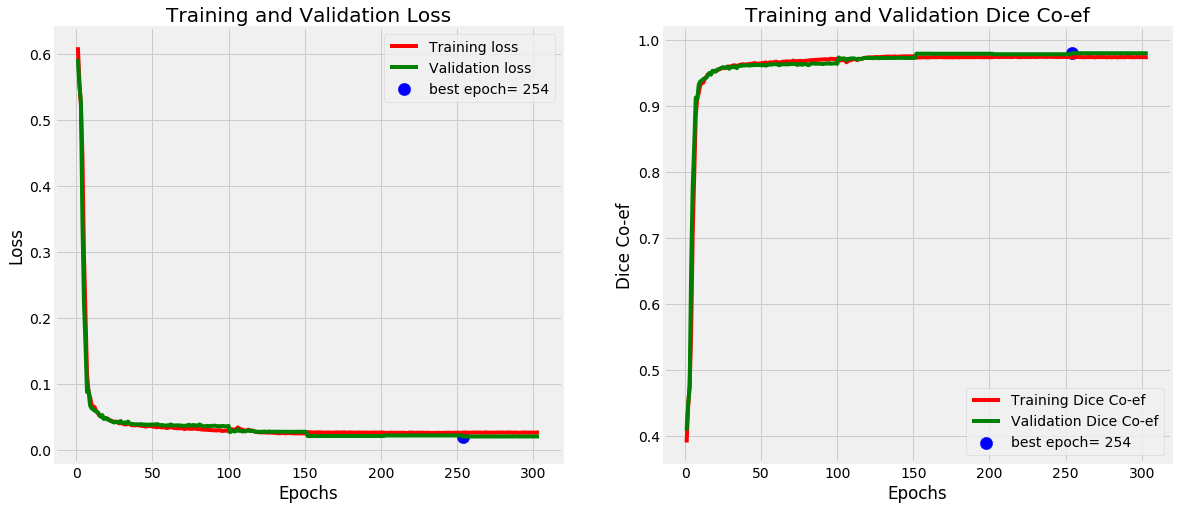

In [6]:
tr_acc=[]
tr_loss=[]
val_acc=[]
val_loss=[]
for history in history_data:
  n=len(history.history['dice_coef'])
  for i in range(n):
    tr_acc.append(history.history['dice_coef'][i])
    tr_loss.append(history.history['loss'][i])
    val_acc.append(history.history['val_dice_coef'][i])
    val_loss.append(history.history['val_loss'][i])

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Dice Co-ef')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Dice Co-ef')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Dice Co-ef')
plt.xlabel('Epochs')
plt.ylabel('Dice Co-ef')
plt.legend()

plt.tight_layout
plt.show()


**Validation (Needed)**

12/12 [==============================] - 5s 396ms/step
Test loss: 0.0323
Test dice: 0.9677
Test binary accuracy: 0.9375
[0.032307381431261696, 0.9676926185687383, 0.9374566475550333, 0.9791924009720484, 0.971889466047287]


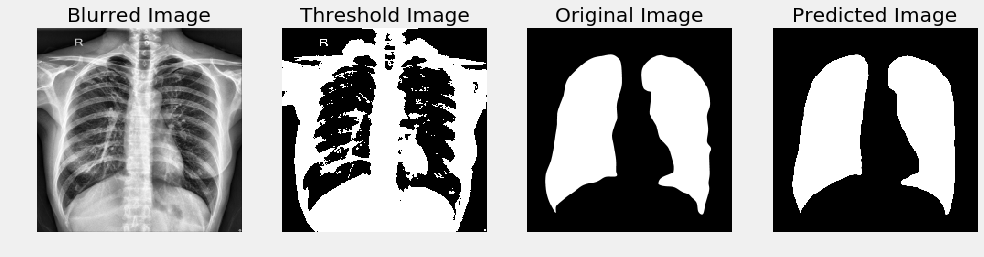

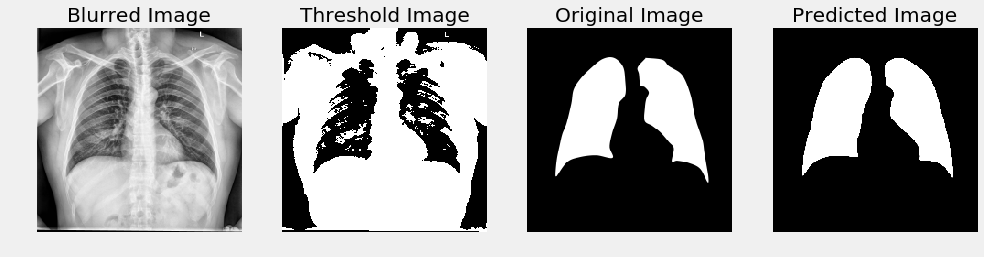

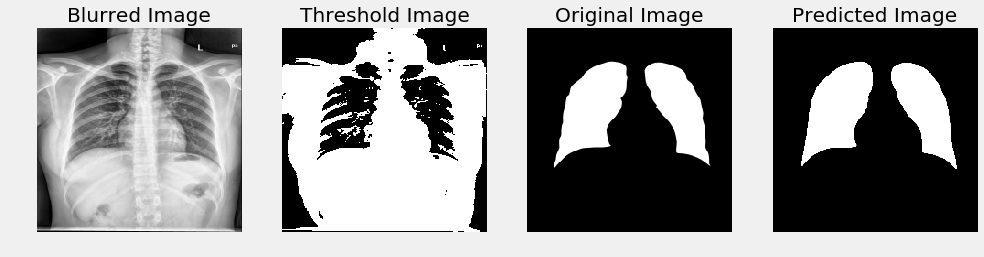

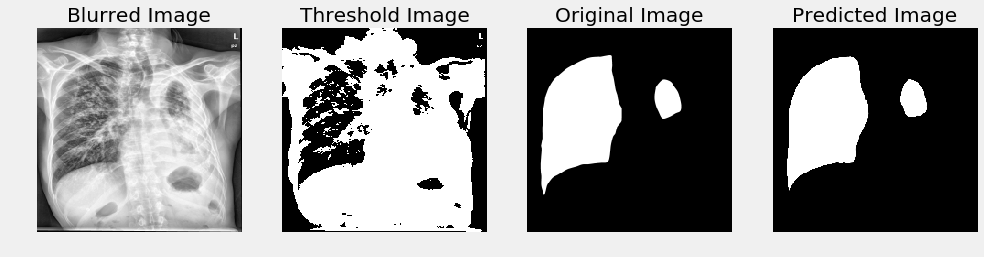

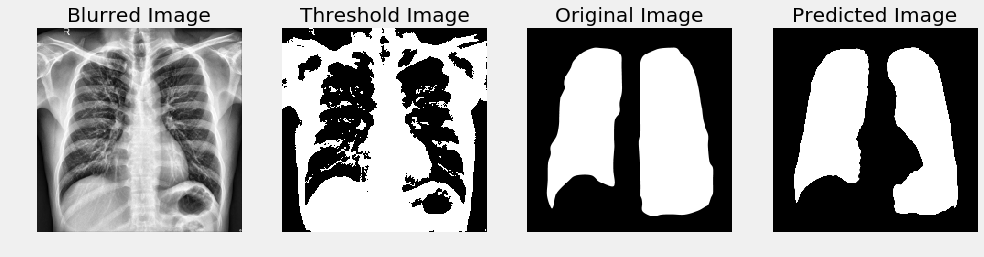

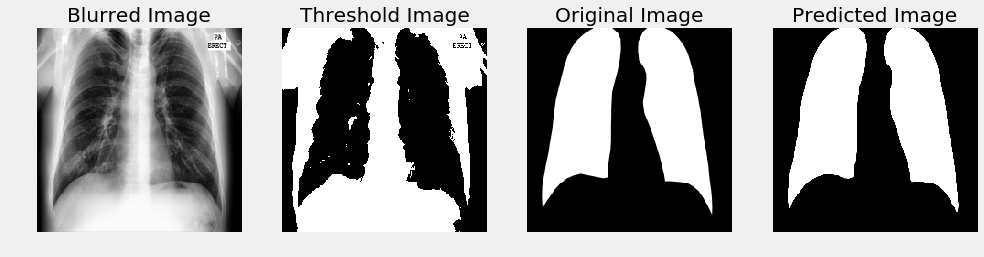

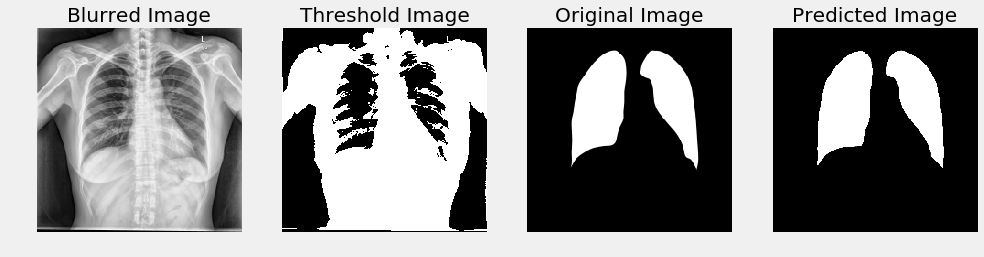

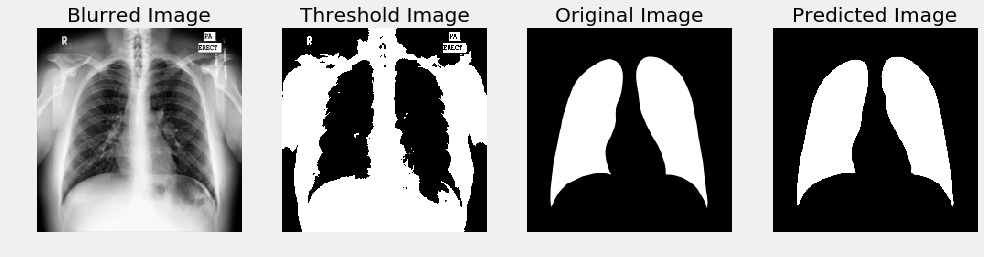

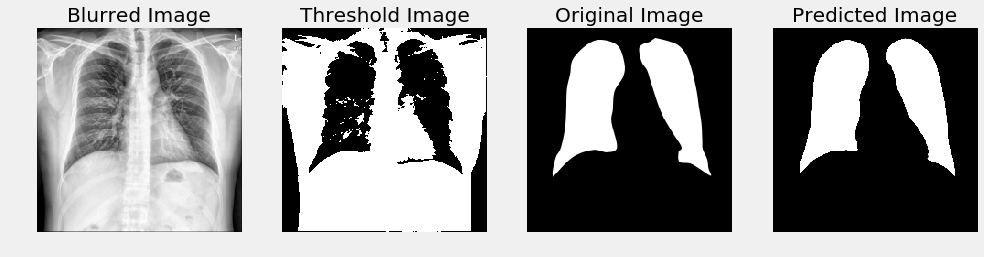

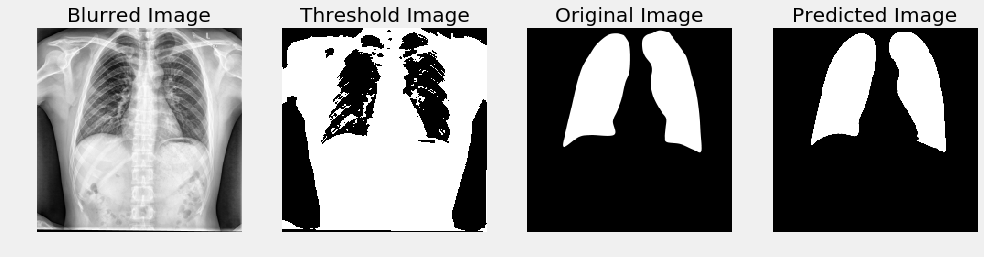

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model on the validation data
results = model.evaluate(test_generator)
loss = results[0]
accuracy = results[1]
dice = results[2]
print(f"Test loss: {loss:.4f}")
print(f"Test dice: {accuracy:.4f}")
print(f"Test binary accuracy: {dice:.4f}")
print(results)

# Number of predictions to plot
n = 10

# Plot predictions
for i in range(n):
    # Get a batch of images from the validation generator
    X_batch, Y_batch = next(iter(val_generator))

    # Extract images from the batch
    blurred_images = X_batch[0]
    threshold_images = X_batch[1]
    original_images = Y_batch

    blurred_image = blurred_images[i]
    threshold_image = threshold_images[i]
    original_image = original_images[i]

    # Predict the original image from the blurred image and threshold image
    predicted_image = model.predict([np.expand_dims(blurred_image, axis=0),
                                     np.expand_dims(threshold_image, axis=0)])[0]

    # Plot the images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(blurred_image.squeeze(), cmap='gray')
    plt.title("Blurred Image")
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(threshold_image.squeeze(), cmap='gray')
    plt.title("Threshold Image")
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(original_image.squeeze(), cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(predicted_image.squeeze(), cmap='gray')
    plt.title("Predicted Image")
    plt.axis('off')

    plt.show()


In [8]:
model.load_weights('/kaggle/working/best_weights')

12/12 [==============================] - 3s 264ms/step
Test loss: 0.0323
Test dice: 0.9677
Test binary accuracy: 0.9375
[0.03230269253253937, 0.9676973074674606, 0.9374655733505884, 0.9792118618885676, 0.971886878212293]


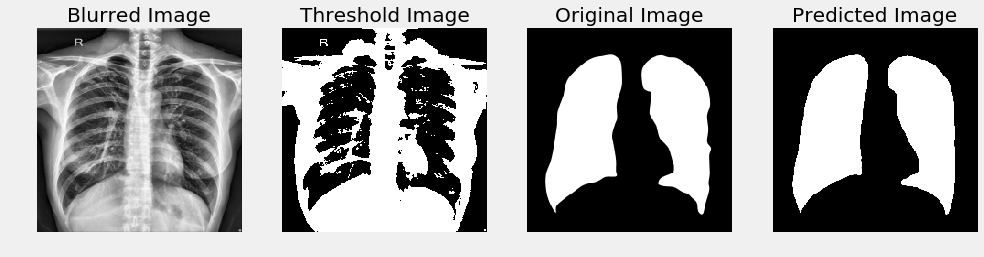

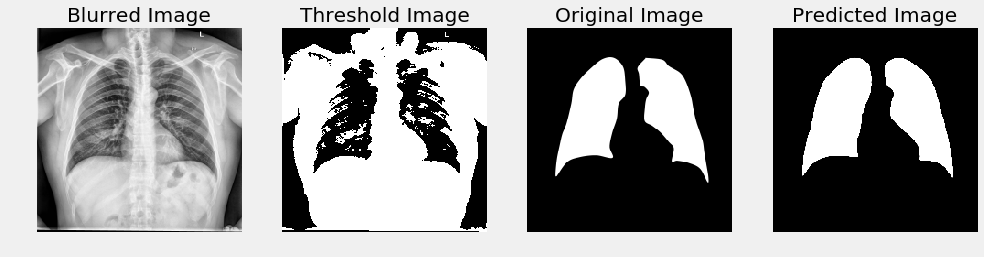

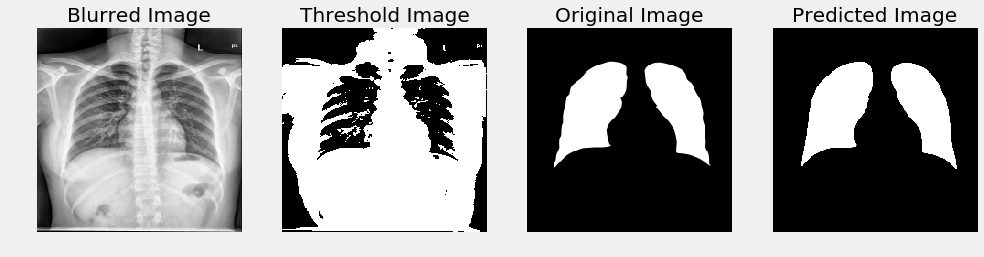

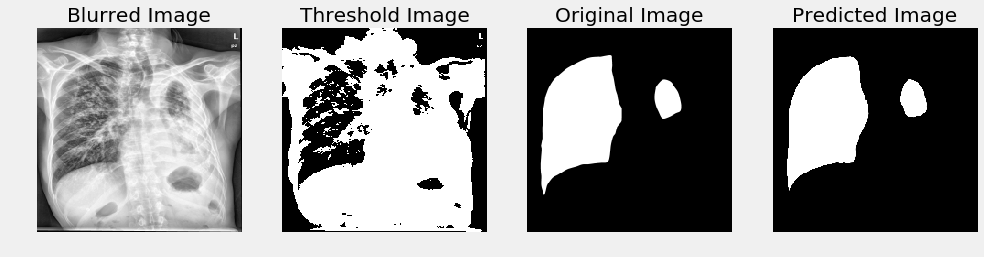

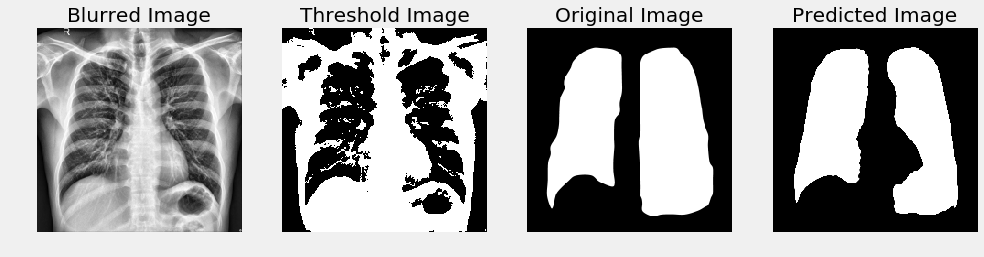

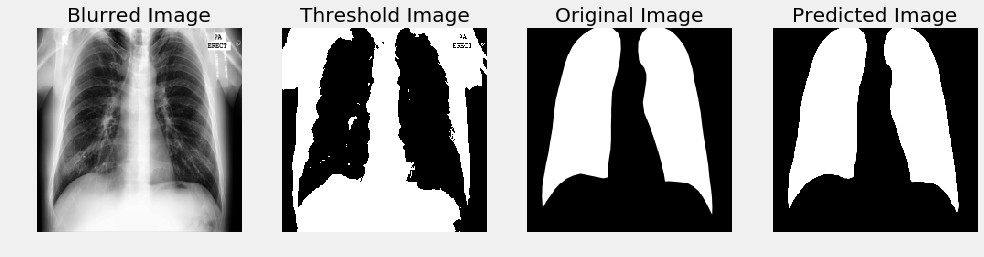

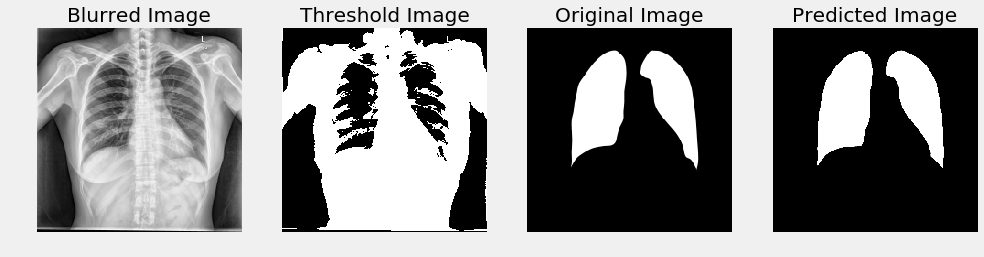

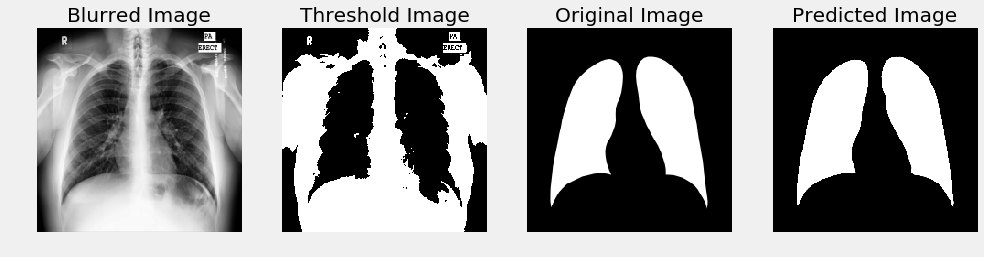

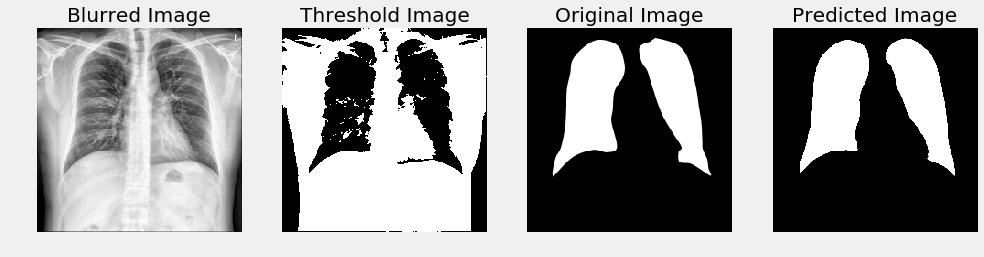

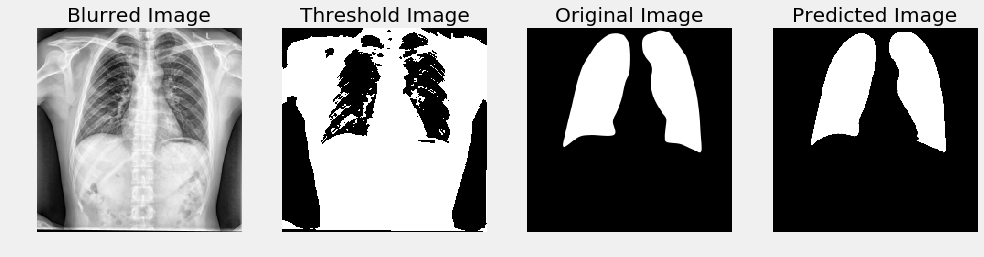

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model on the validation data
results = model.evaluate(test_generator)
loss = results[0]
accuracy = results[1]
dice = results[2]
print(f"Test loss: {loss:.4f}")
print(f"Test dice: {accuracy:.4f}")
print(f"Test binary accuracy: {dice:.4f}")
print(results)

# Number of predictions to plot
n = 10

# Plot predictions
for i in range(n):
    # Get a batch of images from the validation generator
    X_batch, Y_batch = next(iter(val_generator))

    # Extract images from the batch
    blurred_images = X_batch[0]
    threshold_images = X_batch[1]
    original_images = Y_batch

    blurred_image = blurred_images[i]
    threshold_image = threshold_images[i]
    original_image = original_images[i]

    # Predict the original image from the blurred image and threshold image
    predicted_image = model.predict([np.expand_dims(blurred_image, axis=0),
                                     np.expand_dims(threshold_image, axis=0)])[0]

    # Plot the images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(blurred_image.squeeze(), cmap='gray')
    plt.title("Blurred Image")
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(threshold_image.squeeze(), cmap='gray')
    plt.title("Threshold Image")
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(original_image.squeeze(), cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(predicted_image.squeeze(), cmap='gray')
    plt.title("Predicted Image")
    plt.axis('off')

    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K

# Define the Dice coefficient function
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# Evaluate the model on the test data
results = model.evaluate(test_generator)
loss = results[0]
accuracy = results[1]
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

# Calculate Dice coefficient for the test set
dice_scores = []

for i in range(len(test_generator)):
    # Get a batch of images from the test generator
    X_batch, Y_batch = test_generator[i]

    # Extract images from the batch
    blurred_images = X_batch[0]
    threshold_images = X_batch[1]
    original_images = Y_batch

    # Predict the original image from the blurred image and threshold image
    predicted_images = model.predict([blurred_images, threshold_images])

    # Calculate Dice coefficient for each image in the batch
    for j in range(len(predicted_images)):
        dice_score = dice_coef(original_images[j], predicted_images[j])
        dice_scores.append(dice_score)

# Calculate the average Dice coefficient
average_dice_score = np.mean(dice_scores)
print(f"Average Dice coefficient: {average_dice_score:.4f}")

# Plot predictions and Dice coefficient for a few examples
n = 10  # Number of predictions to plot

for i in range(n):
    # Get a batch of images from the test generator
    X_batch, Y_batch = next(iter(test_generator))

    # Extract images from the batch
    blurred_images = X_batch[0]
    threshold_images = X_batch[1]
    original_images = Y_batch

    blurred_image = blurred_images[i]
    threshold_image = threshold_images[i]
    original_image = original_images[i]

    # Predict the original image from the blurred image and threshold image
    predicted_image = model.predict([np.expand_dims(blurred_image, axis=0),
                                     np.expand_dims(threshold_image, axis=0)])[0]

    # Calculate the Dice coefficient for the current image
    dice_score = dice_coef(original_image, predicted_image)
    
    # Plot the images and Dice coefficient
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(blurred_image.squeeze(), cmap='gray')
    plt.title("Blurred Image")
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(threshold_image.squeeze(), cmap='gray')
    plt.title("Threshold Image")
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(original_image.squeeze(), cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(predicted_image.squeeze(), cmap='gray')
    plt.title(f"Predicted Image\nDice: {K.eval(dice_score):.4f}")
    plt.axis('off')

    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# Define the Dice coefficient function
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.cast(K.flatten(y_true), 'float32')
    y_pred_f = K.cast(K.flatten(y_pred), 'float32')
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# Evaluate the model on the test data
results = model.evaluate(test_generator)
loss = results[0]
accuracy = results[1]
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

# Calculate Dice coefficient for the test set
dice_scores = []

for i in range(len(test_generator)):
    # Get a batch of images from the test generator
    X_batch, Y_batch = test_generator[i]

    # Extract images from the batch
    blurred_images = X_batch[0]
    threshold_images = X_batch[1]
    original_images = Y_batch

    # Predict the original image from the blurred image and threshold image
    predicted_images = model.predict([blurred_images, threshold_images])

    # Calculate Dice coefficient for each image in the batch
    for j in range(len(predicted_images)):
        dice_score = dice_coef(original_images[j], predicted_images[j])
        dice_scores.append(K.eval(dice_score))

# Calculate the average Dice coefficient
average_dice_score = np.mean(dice_scores)
print(f"Average Dice coefficient: {average_dice_score:.4f}")

# Plot predictions and Dice coefficient for a few examples
n = 10  # Number of predictions to plot

for i in range(n):
    # Get a batch of images from the test generator
    X_batch, Y_batch = next(iter(test_generator))

    # Extract images from the batch
    blurred_images = X_batch[0]
    threshold_images = X_batch[1]
    original_images = Y_batch

    blurred_image = blurred_images[i]
    threshold_image = threshold_images[i]
    original_image = original_images[i]

    # Predict the original image from the blurred image and threshold image
    predicted_image = model.predict([np.expand_dims(blurred_image, axis=0),
                                     np.expand_dims(threshold_image, axis=0)])[0]

    # Calculate the Dice coefficient for the current image
    dice_score = dice_coef(original_image, predicted_image)
    
    # Plot the images and Dice coefficient
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(blurred_image.squeeze(), cmap='gray')
    plt.title("Blurred Image")
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(threshold_image.squeeze(), cmap='gray')
    plt.title("Threshold Image")
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(original_image.squeeze(), cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(predicted_image.squeeze(), cmap='gray')
    plt.title(f"Predicted Image\nDice: {K.eval(dice_score):.4f}")
    plt.axis('off')

    plt.show()


In [21]:
model.load_weights('/kaggle/working/final_weights.h5')

In [ ]:
from PIL import Image
import numpy as np

# Define file paths for the images
image_paths = [
    '/kaggle/working/data4200/enhanced_images/Normal/Normal-100.png',
    '/kaggle/working/data4200/threshold_images/Normal/Normal-100.png',
    '/kaggle/working/data4200/threshold_images/Normal/Normal-1.png'
]

# Load the images and check their shapes
image_shapes = []
for path in image_paths:
    img = Image.open(path)
    img_array = np.array(img)
    image_shapes.append(img_array.shape)

print(image_shapes)


**Prediction on 4200 (Needed)**

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img
from PIL import Image

# Define paths
input_folder = '/kaggle/working/shen/cxr'
threshold_folder = '/kaggle/working/shen/threshold'
output_folder = '/kaggle/working/shenmask/modelmask'
# model_path = 'path_to_your_trained_unet_model.h5'

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Load the trained U-Net model
# model = load_model(model_path)

# Get the list of files
input_files = sorted(os.listdir(input_folder))
threshold_files = sorted(os.listdir(threshold_folder))

# Ensure the files in both folders match
assert len(input_files) == len(threshold_files), "The number of files in the input and threshold folders do not match."

# Iterate over the files and process each one
for input_file, threshold_file in zip(input_files, threshold_files):
    # Load and preprocess the input image
    input_image_path = os.path.join(input_folder, input_file)
    threshold_image_path = os.path.join(threshold_folder, threshold_file)
    
    input_image = load_img(input_image_path, color_mode='grayscale', target_size=(224, 224))
    threshold_image = load_img(threshold_image_path, color_mode='grayscale', target_size=(224, 224))
    
    input_image_array = img_to_array(input_image) / 255.0
    threshold_image_array = img_to_array(threshold_image) / 255.0
    
    input_image_array = np.expand_dims(input_image_array, axis=0)
    threshold_image_array = np.expand_dims(threshold_image_array, axis=0)
    
    # Predict the output
    prediction = model.predict([input_image_array, threshold_image_array])
    
    # Post-process and save the output image
    prediction_image = prediction[0, :, :, 0] * 255.0
    prediction_image = prediction_image.astype(np.uint8)
    prediction_image = Image.fromarray(prediction_image)
    
    output_image_path = os.path.join(output_folder, input_file)
    prediction_image.save(output_image_path)

print("Predictions saved to", output_folder)


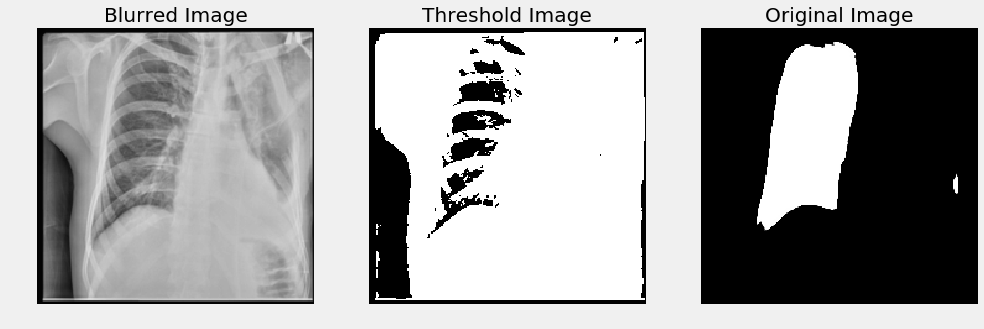

In [23]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img
from PIL import Image
import matplotlib.pyplot as plt


# Define a function to convert an image to a threshold image
def convert_to_threshold(image, threshold_value=128):
    image_array = img_to_array(image)
    threshold_image_array = (image_array > threshold_value).astype(np.uint8) * 255
    return Image.fromarray(threshold_image_array.squeeze(), 'L')


# Load and preprocess the input image
input_image_path = '/kaggle/working/tb4200/cxr/Tuberculosis-107.png'
threshold_image_path = '/kaggle/working/tb4200/threshold/Tuberculosis-107.png'

input_image = load_img(input_image_path, color_mode='grayscale', target_size=(224, 224))
threshold_image = load_img(threshold_image_path, color_mode='grayscale', target_size=(224, 224))

input_image_array = img_to_array(input_image) / 255.0
threshold_image_array = img_to_array(threshold_image) / 255.0

input_image_array = np.expand_dims(input_image_array, axis=0)
threshold_image_array = np.expand_dims(threshold_image_array, axis=0)

# # Manually convert the input image to a threshold image
# threshold_image = convert_to_threshold(input_image, threshold_value=128)
# threshold_image_array = img_to_array(threshold_image) / 255.0
# threshold_image_array = np.expand_dims(threshold_image_array, axis=0)

# Predict the output
prediction = model.predict([input_image_array, threshold_image_array])

# Post-process and save the output image
prediction_image = prediction[0, :, :, 0] * 255.0
prediction_image = prediction_image.astype(np.uint8)
prediction_image = Image.fromarray(prediction_image)


# Plot the images and Dice coefficient
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(input_image, cmap='gray')
plt.title("Blurred Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(threshold_image, cmap='gray')
plt.title("Threshold Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(prediction_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.show()

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image

def list_files(folder):
    """Returns a set of file names in the given folder."""
    return set(os.listdir(folder))

def find_missing_files(folder1, folder2):
    """Finds files in folder1 that are not present in folder2."""
    files1 = list_files(folder1)
    files2 = list_files(folder2)
    missing_files = files1 - files2
    return missing_files

# Define paths
input_folder = '/kaggle/working/shenmon/cxr'
threshold_folder = '/kaggle/working/shenmon/threshold'
output_folder = '/kaggle/working/predmasks'
model_path = '/kaggle/input/latestunet/unet_model_weights.h5'

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Load the trained U-Net model
model.load_weights(model_path)

# Get the list of files
input_files = sorted(os.listdir(input_folder))
threshold_files = sorted(os.listdir(threshold_folder))

# Ensure the files in both folders match
assert len(input_files) == len(threshold_files), "The number of files in the input and threshold folders do not match."


# Iterate over the files and process each one if it's in the missing_files set
for input_file, threshold_file in zip(input_files, threshold_files):
    if input_file in missing_files:
        # Load and preprocess the input image
        input_image_path = os.path.join(input_folder, input_file)
        threshold_image_path = os.path.join(threshold_folder, threshold_file)
        
        input_image = load_img(input_image_path, color_mode='grayscale', target_size=(224, 224))
        threshold_image = load_img(threshold_image_path, color_mode='grayscale', target_size=(224, 224))
        
        input_image_array = img_to_array(input_image) / 255.0
        threshold_image_array = img_to_array(threshold_image) / 255.0
        
        input_image_array = np.expand_dims(input_image_array, axis=0)
        threshold_image_array = np.expand_dims(threshold_image_array, axis=0)
        
        # Predict the output
        prediction = model.predict([input_image_array, threshold_image_array])
        
        # Post-process and save the output image
        prediction_image = prediction[0, :, :, 0] * 255.0
        prediction_image = prediction_image.astype(np.uint8)
        prediction_image = Image.fromarray(prediction_image)
        
        output_image_path = os.path.join(output_folder, input_file)
        prediction_image.save(output_image_path)

print("Predictions saved to", output_folder)


In [ ]:

import matplotlib.pyplot as plt

# Replace 'path/to/image.png' with the actual path where you downloaded the image
image = plt.imread('/kaggle/working/data4200/enhanced_images/Tuberculosis/Tuberculosis-342.png')
plt.imshow(image)
plt.show()

# Replace 'path/to/image.png' with the actual path where you downloaded the image
image = plt.imread('/kaggle/working/data4200/threshold_images/Tuberculosis/Tuberculosis-342.png')
plt.imshow(image)
plt.show()


# Replace 'path/to/image.png' with the actual path where you downloaded the image
image = plt.imread('/kaggle/working/data4200/masks/Tuberculosis/Tuberculosis-342.png')
plt.imshow(image)
print(image.shape)
plt.show()



In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def plot_images_in_folder(folder_path):
    # Get list of files in the folder
    files = sorted(os.listdir(folder_path))
    
    # Filter files to keep only image files
    image_files = [f for f in files if f.lower().endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp'))][50:150]
    
    # Set up matplotlib figure
    num_images = len(image_files)
    num_cols = 4
    num_rows = (num_images + num_cols - 1) // num_cols
    
    plt.figure(figsize=(15, 5 * num_rows))
    
    for i, file in enumerate(image_files):
        image_path = os.path.join(folder_path, file)
        
        # Load image using PIL
        image = Image.open(image_path)
        
        # Plot image
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(image)
        plt.title(file)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
folder_path = '/kaggle/working/data4200/masks/Tuberculosis'  # Replace with your folder path
plot_images_in_folder(folder_path)


In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def plot_images_in_folder(folder_path):
    # Get list of files in the folder
    files = sorted(os.listdir(folder_path))
    
    # Filter files to keep only image files
    image_files = [f for f in files if f.lower().endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp'))][50:150]
    
    # Set up matplotlib figure
    num_images = len(image_files)
    num_cols = 4
    num_rows = (num_images + num_cols - 1) // num_cols
    
    plt.figure(figsize=(15, 5 * num_rows))
    
    for i, file in enumerate(image_files):
        image_path = os.path.join(folder_path, file)
        
        # Load image using PIL
        image = Image.open(image_path)
        
        # Plot image
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(image)
        plt.title(file)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
folder_path = '/kaggle/working/data4200/masks/Normal'  # Replace with your folder path
plot_images_in_folder(folder_path)


In [ ]:

# import os
# import numpy as np
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from PIL import Image
# import matplotlib.pyplot as plt

# # Choose a single image from the folder
# input_file = 'Tuberculosis-342.png'

# # Load and preprocess the input image
# input_image_path = os.path.join(input_folder, input_file)

# # Load the original image
# input_image = load_img(input_image_path, color_mode='grayscale', target_size=(224, 224))

# # Define preprocessing options for the original image
# def preprocess_image(image):
#     image_array = img_to_array(image) / 255.0
#     image_array = np.expand_dims(image_array, axis=0)
#     return image_array

# input_image_array = preprocess_image(input_image)

# # Generate the threshold image
# threshold_image_array = np.zeros_like(input_image_array)  # Initialize with zeros
# threshold_image_array[input_image_array >= 0.2] = 0.7  # Example thresholding condition


# # Predict the output (uncomment once you have loaded your model)
# # prediction = model.predict([input_image_array, np.expand_dims(threshold_image_array, axis=0)])

# # Predict the output (uncomment once you have loaded your model)
# prediction = model.predict([input_image_array, threshold_image_array])


# # Post-process the output image
# # Post-process and save the output image
# prediction_image = prediction[0, :, :, 0] * 255.0
# prediction_image = prediction_image.astype(np.uint8)
# prediction_image = Image.fromarray(prediction_image)

# # Plot the original, threshold, and predicted images
# plt.figure(figsize=(12, 4))

# # Original image
# plt.subplot(1, 3, 1)
# plt.imshow(input_image_array[0, :, :, 0], cmap='gray')
# plt.title('Original Image')
# plt.axis('off')

# # Threshold image
# plt.subplot(1, 3, 2)
# plt.imshow(threshold_image_array[0, :, :, 0], cmap='gray')
# plt.title('Threshold Image')
# plt.axis('off')

# # Predicted image
# plt.subplot(1, 3, 3)
# plt.imshow(prediction_image, cmap='gray')
# plt.title('Predicted Mask')
# plt.axis('off')

# plt.tight_layout()
# plt.show()



In [ ]:
# import os

# # Define the path to the file to be deleted
# file_path = '/kaggle/working/data4200/masks/Tuberculosis/predicted_mask.png'

# # Check if the file exists before attempting to delete
# if os.path.exists(file_path):
#     os.remove(file_path)
#     print(f"File {file_path} has been deleted.")
# else:
#     print(f"File {file_path} does not exist.")


## Callbacks, Early Stopping and Reduced LR


In [ ]:
model.load_weights('/kaggle/input/cxr-mask-weight-high/cxr_reg_weights.best_high.hdf5')

In [ ]:
# Path to the image and output directory
image_path = '/kaggle/input/tb-images-enhanced/content/enhanced_images/Tuberculosis-510.png'
output_dir = '/kaggle/working/Try'

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Function to load and preprocess image
def load_and_preprocess_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (512, 512))
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    return img

# Function to predict mask and save it
def predict_and_save_mask(image_path, output_dir, model):
    image = load_and_preprocess_image(image_path)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    mask = model.predict(image)[0]
    mask = (mask * 255).astype(np.uint8)

    # Save the mask image
    filename = os.path.basename(image_path)
    mask_output_path = os.path.join(output_dir, f'{os.path.splitext(filename)[0]}_mask.png')
    cv2.imwrite(mask_output_path, mask)

# Create mask for the specified image
predict_and_save_mask(image_path, output_dir, model)

print("Mask generation complete.")


import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = '/kaggle/working/Try/Tuberculosis-510_mask.png'  # Replace with your image path
image = Image.open(image_path)

# Plot the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = '/kaggle/working/Try/Tuberculosis-1_mask.png'  # Replace with your image path
image = Image.open(image_path)

# Plot the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()


In [ ]:
import os
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image

# Path to the input directory and output directory
input_dir = '/kaggle/working//TB_Norm_Enhanced'
output_dir = '/kaggle/working/Mask_Norm/'

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Function to load and preprocess image
def load_and_preprocess_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (512, 512))
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    return img

# Function to predict mask and save it
def predict_and_save_mask(image_path, output_dir, model):
    image = load_and_preprocess_image(image_path)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    mask = model.predict(image)[0]
    mask = (mask * 255).astype(np.uint8)

    # Save the mask image
    filename = os.path.basename(image_path)
    mask_output_path = os.path.join(output_dir, f'{os.path.splitext(filename)[0]}.png')
    cv2.imwrite(mask_output_path, mask)

# Iterate through all images in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        image_path = os.path.join(input_dir, filename)
        predict_and_save_mask(image_path, output_dir, model)

print("Mask generation complete for all images.")

# Plot an example image
example_image_path = os.path.join(output_dir, 'Normal-500.png')  # Replace with an actual mask image path
image = Image.open(example_image_path)

# Plot the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()


In [ ]:
import shutil
import os

# Specify the folder you want to zip
folder_to_zip = '/kaggle/working/TB_Norm_Enhanced'

# Specify the name and path for the output zip file
output_zip_file = '/kaggle/working/TB_Norm_Enhanced.zip'

# Create the zip archive
shutil.make_archive(base_name=output_zip_file.replace('.zip', ''), format='zip', root_dir=folder_to_zip)

print(f"Folder '{folder_to_zip}' has been zipped as '{output_zip_file}'")


In [ ]:
import imageio
import numpy as np
from scipy.ndimage import binary_fill_holes
import matplotlib.pyplot as plt

# Step 1: Read the mask image
mask_image_path = '/kaggle/working/Try/Tuberculosis-500_mask.png'
mask_image = imageio.imread(mask_image_path)

# Step 2: Convert to binary array (if not already binary)
binary_mask = mask_image > 0  # Adjust the threshold as needed

# Step 3: Fill holes in the binary mask
filled_mask = binary_fill_holes(binary_mask)

# Step 4: Save or display the filled mask
output_image_path = '/kaggle/working/Try/filled_mask.png'
imageio.imwrite(output_image_path, (filled_mask * 255).astype(np.uint8))

# Optional: Display the original and filled mask
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Mask')
plt.imshow(mask_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Filled Mask')
plt.imshow(filled_mask, cmap='gray')

plt.show()


In [ ]:
import imageio
import numpy as np
from scipy.ndimage import binary_fill_holes, binary_dilation
import matplotlib.pyplot as plt

# Step 1: Read the mask image
mask_image_path = '/kaggle/working/data4200/masks/Tuberculosis/Tuberculosis-1.png'
mask_image = imageio.imread(mask_image_path)

# Step 2: Convert to binary array (if not already binary)
binary_mask = mask_image > 150  # Adjust the threshold as needed

# Step 3: Fill holes in the binary mask
filled_mask = binary_fill_holes(binary_mask)

# Step 4: Apply binary dilation
dilated_mask = binary_dilation(filled_mask, iterations=10)

# Fill holes again after dilation
again_filled_mask = binary_fill_holes(dilated_mask)

# Step 5: Save the processed mask
output_image_path = '/kaggle/working/processed_mask.png'
imageio.imwrite(output_image_path, (again_filled_mask * 255).astype(np.uint8))

# Display the original, filled, dilated, and again filled masks
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.title('Original Mask')
plt.imshow(mask_image, cmap='gray')

plt.subplot(1, 4, 2)
plt.title('Filled Mask')
plt.imshow(filled_mask, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Dilated Mask')
plt.imshow(dilated_mask, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Again Filled Mask')
plt.imshow(again_filled_mask, cmap='gray')

plt.show()


**Final Process (Needed)**

In [ ]:
import imageio
import numpy as np
import os
from scipy.ndimage import binary_fill_holes, binary_dilation
import matplotlib.pyplot as plt

# Define the input and output directories
input_dir = '/kaggle/working/shenmask/modelmask'
output_dir = '/kaggle/working/shenmask/enh10'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Process each image in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Adjust the extension if needed
        # Step 1: Read the mask image
        mask_image_path = os.path.join(input_dir, filename)
        mask_image = imageio.imread(mask_image_path)

        # Step 2: Convert to binary array (if not already binary)
        binary_mask = mask_image > 150  # Adjust the threshold as needed

        # Step 3: Fill holes in the binary mask
        filled_mask = binary_fill_holes(binary_mask)

        # Step 4: Apply binary dilation
        dilated_mask = binary_dilation(filled_mask, iterations=10)

        # Fill holes again after dilation
        again_filled_mask = binary_fill_holes(dilated_mask)

        # Step 5: Save the processed mask
        output_image_path = os.path.join(output_dir, filename)
        imageio.imwrite(output_image_path, (again_filled_mask * 255).astype(np.uint8))

# Display the original, filled, dilated, and again filled masks for the last processed image
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.title('Original Mask')
plt.imshow(mask_image, cmap='gray')

plt.subplot(1, 4, 2)
plt.title('Filled Mask')
plt.imshow(filled_mask, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Dilated Mask')
plt.imshow(dilated_mask, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Again Filled Mask')
plt.imshow(again_filled_mask, cmap='gray')

plt.show()


In [ ]:
import cv2
import os
import numpy as np

# Define the input and output directories
input_dir = '/kaggle/working/shenmask/enh3'
output_dir = '/kaggle/working/shenmask/enh3dill20'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create a vertical kernel for dilation
kernel = np.array([[0, 1, 0],
                   [0, 1, 0],
                   [0, 0, 0]], dtype=np.uint8)

# Iterate over all files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(".png"):  # Check if the file is a PNG image
        # Construct the full path to the input image
        image_path = os.path.join(input_dir, filename)
        
        # Read the binary mask image
        binary_mask = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        # Apply dilation with 20 iterations
        dilated_mask = cv2.dilate(binary_mask, kernel, iterations=20)
        
        # Construct the full path to the output image
        output_path = os.path.join(output_dir, filename)
        
        # Save the dilated mask image
        cv2.imwrite(output_path, dilated_mask)

print("Dilation applied to all images and saved to the output directory.")

In [ ]:
import shutil
import os

# Specify the folder you want to zip
folder_to_zip = '/kaggle/working/montmaskdilldown'

# Specify the name and path for the output zip file
output_zip_file = '/kaggle/working/montmaskdilldown.zip'

# Create the zip archive
shutil.make_archive(base_name=output_zip_file.replace('.zip', ''), format='zip', root_dir=folder_to_zip)

print(f"Folder '{folder_to_zip}' has been zipped as '{output_zip_file}'")


In [ ]:
import imageio
import numpy as np
import os
from scipy.ndimage import binary_fill_holes, binary_dilation
import matplotlib.pyplot as plt

# Define the input and output directories
input_dir = '/kaggle/working/Mask_Norm'
output_dir = '/kaggle/working/Mask_Norm_Enh_Filled_FInal'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Process each image in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Adjust the extension if needed
        # Step 1: Read the mask image
        mask_image_path = os.path.join(input_dir, filename)
        mask_image = imageio.imread(mask_image_path)

        # Step 2: Convert to binary array (if not already binary)
        binary_mask = mask_image > 0  # Adjust the threshold as needed

        # Step 3: Fill holes in the binary mask
        filled_mask = binary_fill_holes(binary_mask)

        # Step 4: Apply binary dilation
        dilated_mask = binary_dilation(filled_mask, iterations=5)

        # Fill holes again after dilation
        again_filled_mask = binary_fill_holes(dilated_mask)

        # Step 5: Save the processed mask
        output_image_path = os.path.join(output_dir, filename)
        imageio.imwrite(output_image_path, (again_filled_mask * 255).astype(np.uint8))

# Display the original, filled, dilated, and again filled masks for the last processed image
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.title('Original Mask')
plt.imshow(mask_image, cmap='gray')

plt.subplot(1, 4, 2)
plt.title('Filled Mask')
plt.imshow(filled_mask, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Dilated Mask')
plt.imshow(dilated_mask, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Again Filled Mask')
plt.imshow(again_filled_mask, cmap='gray')

plt.show()


In [ ]:
import shutil
import os

# Specify the folder you want to zip
folder_to_zip = '/kaggle/working/Mask_Norm_Enh_Filled_FInal'

# Specify the name and path for the output zip file
output_zip_file = '/kaggle/working/Mask_Norm_Enh_Filled_FInal.zip'

# Create the zip archive
shutil.make_archive(base_name=output_zip_file.replace('.zip', ''), format='zip', root_dir=folder_to_zip)

print(f"Folder '{folder_to_zip}' has been zipped as '{output_zip_file}'")


In [ ]:
import zipfile
import os

def zip_folder(folder_path, output_zip):
    """
    Zip the contents of a folder (recursively) into a zip file.
    
    Args:
    - folder_path (str): Path to the folder to be zipped.
    - output_zip (str): Path to the output zip file.
    """
    with zipfile.ZipFile(output_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(folder_path):
            for file in files:
                zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), folder_path))

# Example usage:
folder_to_zip = '/kaggle/working/jsrt'
output_zip_file = '/kaggle/working/jsrtshenmonenh.zip'

zip_folder(folder_to_zip, output_zip_file)
